We will be analyzing restaurant data from the different restaurants we specified in Progress Report #1.

In [31]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading pa

True

In [32]:
data = pd.read_csv('data/anthony-and-sonne-panini-shoppe/csv/detailed-reviews-of-anthony-and-sonne-panini-shoppe.csv')

df = data[['place_name', 'rating', 'review_text', 'published_at_date']]
df

,place_name,rating,review_text,published_at_date
0,Anthony & Son Panini Shoppe,5,Great,2024-02-26 20:16:14.572279
1,Anthony & Son Panini Shoppe,5,The best Italian sandwitch ever. I like the cl...,2024-02-26 20:16:14.586832
2,Anthony & Son Panini Shoppe,5,Nicest sandwich shop I ve ever been in. Anthon...,2024-02-25 20:16:14.596605
3,Anthony & Son Panini Shoppe,3,"Ehh, after all I heard I had really high hopes...",2024-02-25 20:16:14.602618
4,Anthony & Son Panini Shoppe,5,NaN,2024-02-25 20:16:14.610050
...,...,...,...,...
957,Anthony & Son Panini Shoppe,5,This shop feeds me almost every night. Great s...,2014-03-03 20:18:51.408169
958,Anthony & Son Panini Shoppe,5,like everything about this place. i think i tr...,2014-03-03 20:18:51.410891
959,Anthony & Son Panini Shoppe,5,Very good experience in this place. Been here ...,2014-03-03 20:18:51.413436
960,Anthony & Son Panini Shoppe,5,BEST SANDWICHES IN TOWN. - WHEN BUYING GOOD ...,2014-03-03 20:18:52.195873


Extracting Year from 'published_at_date' column

In [33]:
df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_7656/2592446673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year


,place_name,rating,review_text,published_at_date
0,Anthony & Son Panini Shoppe,5,Great,2024
1,Anthony & Son Panini Shoppe,5,The best Italian sandwitch ever. I like the cl...,2024
2,Anthony & Son Panini Shoppe,5,Nicest sandwich shop I ve ever been in. Anthon...,2024
3,Anthony & Son Panini Shoppe,3,"Ehh, after all I heard I had really high hopes...",2024
4,Anthony & Son Panini Shoppe,5,NaN,2024
...,...,...,...,...
957,Anthony & Son Panini Shoppe,5,This shop feeds me almost every night. Great s...,2014
958,Anthony & Son Panini Shoppe,5,like everything about this place. i think i tr...,2014
959,Anthony & Son Panini Shoppe,5,Very good experience in this place. Been here ...,2014
960,Anthony & Son Panini Shoppe,5,BEST SANDWICHES IN TOWN. - WHEN BUYING GOOD ...,2014


Charts for ratings

<AxesSubplot: >

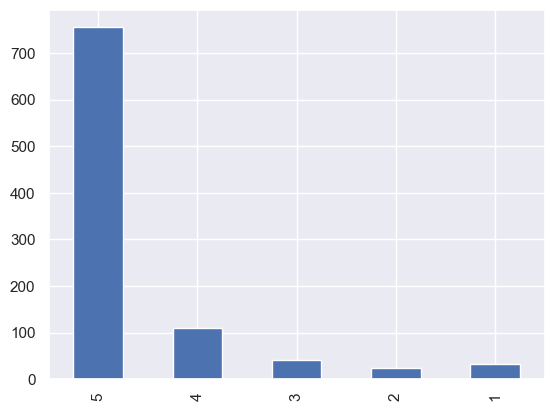

In [34]:
df['rating'].value_counts()[[5, 4, 3, 2, 1]].plot(kind='bar')

<AxesSubplot: title={'center': 'Restaurant Ratings'}, ylabel='rating'>

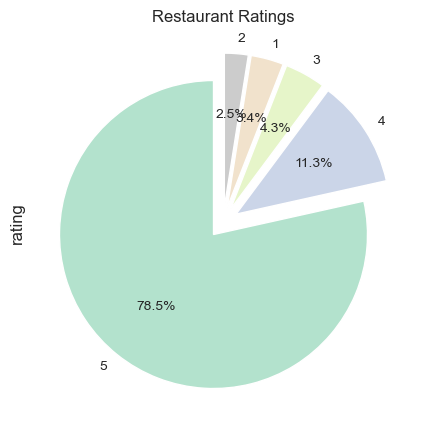

In [35]:
kwargs = dict(
    startangle = 90,
    colormap   = 'Pastel2',
    fontsize   = 10,
    explode    = (0.1,0.1,0.1,0.1,0.1),
    figsize    = (60,5),
    autopct    = '%1.1f%%',
    title      = 'Restaurant Ratings'
)

df['rating'].value_counts().plot.pie(**kwargs)

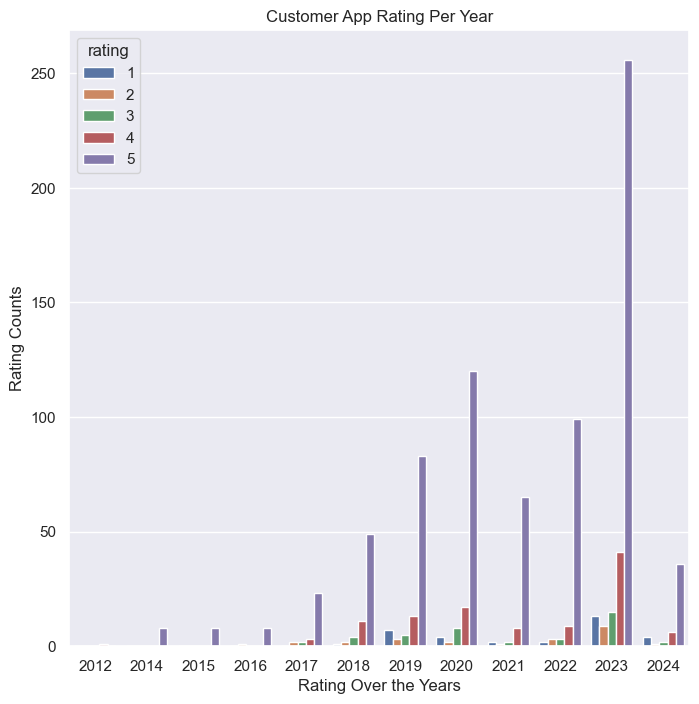

In [36]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'published_at_date', hue ='rating', data = df)
plt.title('Customer App Rating Per Year')
plt.xlabel("Rating Over the Years")
plt.ylabel('Rating Counts')
plt.show()

In [37]:
df['review_text'] = df['review_text'].astype("string")

df[['review_text']]

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_7656/2693296585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text'] = df['review_text'].astype("string")


,review_text
0,Great
1,The best Italian sandwitch ever. I like the cl...
2,Nicest sandwich shop I ve ever been in. Anthon...
3,"Ehh, after all I heard I had really high hopes..."
4,<NA>
...,...
957,This shop feeds me almost every night. Great s...
958,like everything about this place. i think i tr...
959,Very good experience in this place. Been here ...
960,BEST SANDWICHES IN TOWN. - WHEN BUYING GOOD ...


In [38]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = 'Stopwords.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [39]:
test_sentence = "Service was excellent, food was delicious, and vibe was great ! We got the korean style boneless fried chicken (sweet chili sauce was fire), veg buckwheat pancake, and spicy chicken. Our server was so kind and attentive & we had a great experience; the sweet treat cookie at end was so cute :)"

preprocess(test_sentence)

'servic excel food delici vibe great korean style boneless fri chicken sweet chili sauc fire veg buckwheat pancak spici chicken server kind attent great experi sweet treat cooki end cute'

In [40]:
prep = []

for text in df['review_text']:
    if pd.isna(text):
        prep.append('')
    else:
        prep.append(preprocess(text))

df['prep'] = prep

df.head()

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_7656/1628437642.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prep'] = prep


,place_name,rating,review_text,published_at_date,prep
0,Anthony & Son Panini Shoppe,5,Great,2024,great
1,Anthony & Son Panini Shoppe,5,The best Italian sandwitch ever. I like the cl...,2024,italian sandwitch classic amthoni son sandwitc...
2,Anthony & Son Panini Shoppe,5,Nicest sandwich shop I ve ever been in. Anthon...,2024,nicest sandwich shop ve anthoni gentleman made...
3,Anthony & Son Panini Shoppe,3,"Ehh, after all I heard I had really high hopes...",2024,ehh heard high hope decent great tbh
4,Anthony & Son Panini Shoppe,5,<NA>,2024,


In [41]:
from collections import Counter
Counter(" ".join(df["prep"]).split()).most_common(50)

[('sandwich', 360),
 ('great', 149),
 ('food', 119),
 ('good', 112),
 ('place', 106),
 ('order', 80),
 ('delici', 77),
 ('panini', 67),
 ('servic', 64),
 ('hero', 59),
 ('fresh', 55),
 ('amaz', 52),
 ('brooklyn', 46),
 ('chicken', 44),
 ('anthoni', 43),
 ('back', 42),
 ('fdni', 40),
 ('staff', 40),
 ('recommend', 37),
 ('time', 36),
 ('make', 36),
 ('shop', 35),
 ('love', 35),
 ('italian', 34),
 ('friendli', 33),
 ('excel', 33),
 ('price', 32),
 ('sauc', 32),
 ('bread', 31),
 ('spot', 31),
 ('deli', 30),
 ('chees', 29),
 ('worth', 29),
 ('mozzarella', 28),
 ('menu', 27),
 ('option', 26),
 ('wait', 26),
 ('made', 24),
 ('awesom', 24),
 ('son', 23),
 ('super', 23),
 ('lunch', 22),
 ('tast', 22),
 ('cutlet', 22),
 ('eat', 22),
 ('nice', 22),
 ('godfath', 21),
 ('qualiti', 21),
 ('guy', 21),
 ('custom', 20)]

In [42]:
def create_sentiment(rating):
    
    if rating==1 or rating==2:
        return -1 # negative sentiment
    elif rating==4 or rating==5:
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

df['sentiment'] = df['rating'].apply(create_sentiment)
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_7656/1400198503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['rating'].apply(create_sentiment)


,place_name,rating,review_text,published_at_date,prep,sentiment
0,Anthony & Son Panini Shoppe,5,Great,2024,great,1
1,Anthony & Son Panini Shoppe,5,The best Italian sandwitch ever. I like the cl...,2024,italian sandwitch classic amthoni son sandwitc...,1
2,Anthony & Son Panini Shoppe,5,Nicest sandwich shop I ve ever been in. Anthon...,2024,nicest sandwich shop ve anthoni gentleman made...,1
3,Anthony & Son Panini Shoppe,3,"Ehh, after all I heard I had really high hopes...",2024,ehh heard high hope decent great tbh,0
4,Anthony & Son Panini Shoppe,5,<NA>,2024,,1
...,...,...,...,...,...,...
957,Anthony & Son Panini Shoppe,5,This shop feeds me almost every night. Great s...,2014,shop feed night great sandwich excel sauc nute...,1
958,Anthony & Son Panini Shoppe,5,like everything about this place. i think i tr...,2014,place sandwich good pasta,1
959,Anthony & Son Panini Shoppe,5,Very good experience in this place. Been here ...,2014,good experi place coupl time enjoy sandwich,1
960,Anthony & Son Panini Shoppe,5,BEST SANDWICHES IN TOWN. - WHEN BUYING GOOD ...,2014,sandwich town buy good food price matter pay good,1


<AxesSubplot: xlabel='sentiment', ylabel='count'>

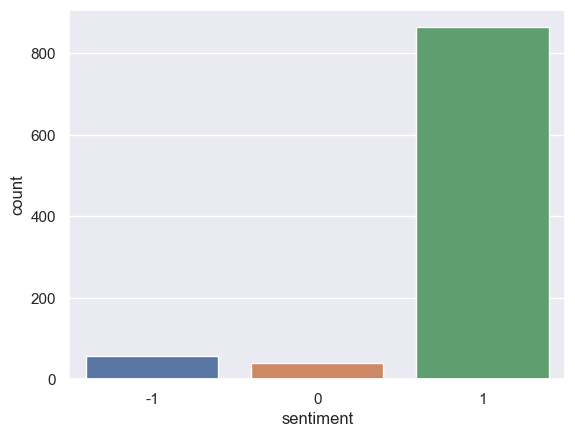

In [43]:
sns.set_theme()

# Create a visualization
sns.countplot(
    data=df,
    x="sentiment"
)

In [44]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment




# apply get_sentiment function

df['review_sentiment'] = df['prep'].apply(get_sentiment)

df['review_sentiment']

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_7656/392351022.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_sentiment'] = df['prep'].apply(get_sentiment)


0      1
1      1
2      1
3      1
4      0
      ..
957    1
958    1
959    1
960    1
961    1
Name: review_sentiment, Length: 962, dtype: int64

<AxesSubplot: xlabel='review_sentiment', ylabel='count'>

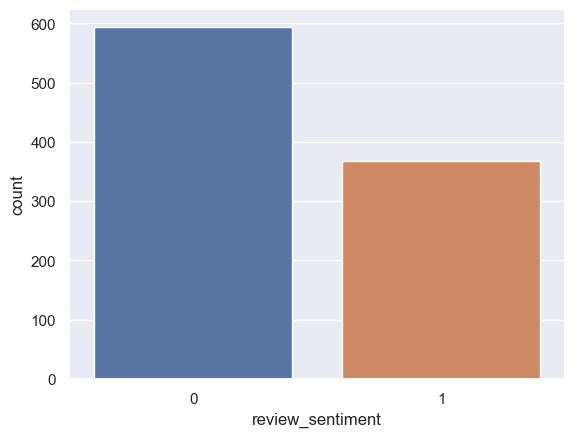

In [45]:
sns.set_theme()

# Create a visualization
sns.countplot(
    data=df,
    x="review_sentiment"
)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(df['prep'])

from sklearn.model_selection import train_test_split
y = df['sentiment'] # target variable
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train) # fit the model
preds = lr.predict(X_test) # make predictions

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(preds,y_test)

0.8879668049792531

In [49]:
# make altered data into csv file
df.to_csv('altdata/' + 'panini.csv', index=False)